<a href="https://colab.research.google.com/github/mads5/StockPredictor/blob/main/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as web
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')
days = 90
stock = 'IRCTC.NS'
end = date.today()
start = '1993-01-01'
data_source='yahoo'
print(end)

2020-07-22


In [ ]:
#Get the stock data
df = web.DataReader(stock, data_source, start, end)
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-14,743.799988,625.000000,626.000000,727.750000,45270607.0,723.979370
2019-10-15,747.400024,696.049988,736.000000,713.150024,10530041.0,709.455078
2019-10-16,721.000000,698.250000,714.000000,700.650024,3476306.0,697.019836
2019-10-17,733.000000,687.150024,700.099976,724.299988,5032930.0,720.547241
2019-10-18,789.900024,716.049988,725.000000,779.150024,9733230.0,775.113098
...,...,...,...,...,...,...
2020-07-16,1379.000000,1335.000000,1355.000000,1364.199951,528359.0,1364.199951
2020-07-17,1400.000000,1366.699951,1374.000000,1370.949951,807342.0,1370.949951
2020-07-20,1389.000000,1371.000000,1380.000000,1376.449951,505154.0,1376.449951


In [ ]:
#Get the number of rows and columns in data set
df.shape

(191, 6)

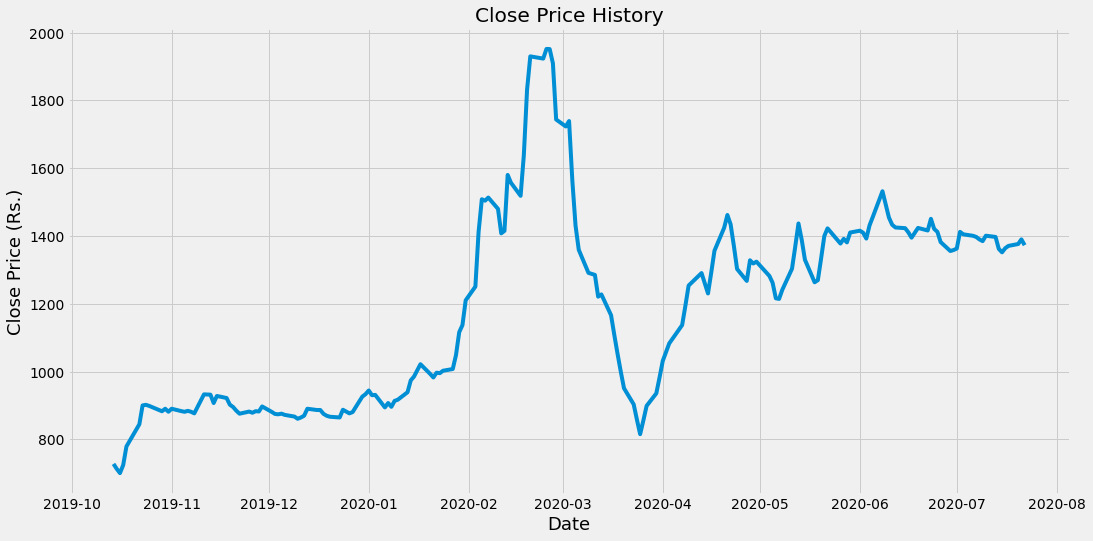

In [ ]:
#Visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (Rs.)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

153

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02165746],
       [0.00998961],
       [0.        ],
       [0.01890032],
       [0.06273476],
       [0.11512027],
       [0.15955404],
       [0.16095259],
       [0.15855508],
       [0.14580833],
       [0.15168225],
       [0.14468952],
       [0.1517222 ],
       [0.14608807],
       [0.14452968],
       [0.14676734],
       [0.14452968],
       [0.14085352],
       [0.18560698],
       [0.18492766],
       [0.16514823],
       [0.18185088],
       [0.17701591],
       [0.16135217],
       [0.15587789],
       [0.14716693],
       [0.14005435],
       [0.14504916],
       [0.14229201],
       [0.14592822],
       [0.1452889 ],
       [0.15711659],
       [0.14417004],
       [0.13933508],
       [0.13861581],
       [0.1400943 ],
       [0.13721726],
       [0.13326142],
       [0.12806682],
       [0.1310637 ],
       [0.13525934],
       [0.1517222 ],
       [0.14868537],
       [0.14872531],
       [0.13961477],
       [0.13509949],
       [0.13282183],
       [0.131

In [ ]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train dataset
x_train = []
y_train = []

for i in range(days, len(train_data)):
  x_train.append(train_data[i-days:i, 0])
  y_train.append(train_data[i, 0])
  if i <= days+1:
    print(x_train)
    print(y_train)
    print()

[array([0.02165746, 0.00998961, 0.        , 0.01890032, 0.06273476,
       0.11512027, 0.15955404, 0.16095259, 0.15855508, 0.14580833,
       0.15168225, 0.14468952, 0.1517222 , 0.14608807, 0.14452968,
       0.14676734, 0.14452968, 0.14085352, 0.18560698, 0.18492766,
       0.16514823, 0.18185088, 0.17701591, 0.16135217, 0.15587789,
       0.14716693, 0.14005435, 0.14504916, 0.14229201, 0.14592822,
       0.1452889 , 0.15711659, 0.14417004, 0.13933508, 0.13861581,
       0.1400943 , 0.13721726, 0.13326142, 0.12806682, 0.1310637 ,
       0.13525934, 0.1517222 , 0.14868537, 0.14872531, 0.13961477,
       0.13509949, 0.13282183, 0.1311436 , 0.14936464, 0.14085352,
       0.14381041, 0.18021259, 0.18604651, 0.19475742, 0.18360906,
       0.18440823, 0.15487893, 0.16522817, 0.15623752, 0.17022298,
       0.17309997, 0.19060179, 0.2185727 , 0.22756335, 0.24214818,
       0.25669302, 0.2339167 , 0.22544553, 0.23671379, 0.23563493,
       0.24138896, 0.24530486, 0.27815068, 0.33225447, 0.3488

In [ ]:
#Convert x_trtain and y_train dataset to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(63, 90, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
#Create the testing dataset
#Create a new array containing scaled values from index 1576 to 2003
test_data = scaled_data[training_data_len - days:, :]
#create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(days, len(test_data)):
  x_test.append(test_data[i-days:i, 0])

In [ ]:
#Convert the data to numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

In [ ]:
#Get the model to predict values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squares error (RMSE)
rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (Rs.)', fontsize=18)
#plt.plot(train['Open'])
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [ ]:
#Show the valid and predicted prices
valid

In [ ]:
#Get the quote
vipind_quote = web.DataReader(stock, data_source, start, end)
#Create a new dataframe
new_df = vipind_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-days:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
#Get the quote
apple_quote2 = web.DataReader(stock, data_source, start, end)
print(apple_quote2['Close'])